In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import copy

In [2]:
filepath = '/Users/dangoldberg/Desktop/DataScienceInterviewProjects/Toronto Blue Jays/catcherframe.csv'

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.columns

Index(['parkid', 'bluejaysgameid', 'gamepitchsequence', 'half', 'balls',
       'strikes', 'pitcherid', 'pitcherhand', 'batterid', 'batside',
       'catcherid', 'pitchtype', 'relspeed', 'hbreak', 'vbreak', 'plate_x',
       'plate_z', 'calledstrike', 'ball', 'swings', 'takes', 'pitchout',
       'intentball', 'inplay', 'pitcheventtype', 'hbp', 'ump_hp'],
      dtype='object')

In [5]:
df.sample(100)

,parkid,bluejaysgameid,gamepitchsequence,half,balls,strikes,pitcherid,pitcherhand,batterid,batside,...,calledstrike,ball,swings,takes,pitchout,intentball,inplay,pitcheventtype,hbp,ump_hp
141601,226,53B12ED4-6BAD-4BC3-B1A9-C5168A4EB9FE,134,1,0,0,160530,R,9074,L,...,0,1,0,1,0,0,0,ball,0,132664.0
212554,311,AF13BCE3-9A19-4AAF-A9EA-7956DF977457,20,1,3,0,529,R,9151,L,...,0,1,0,1,0,0,0,ball,0,142393.0
288662,454,165536F6-C99C-4DA5-8D87-418593DE2944,180,1,2,2,164413,R,122,R,...,0,0,1,0,0,0,0,foul,0,NaN
286520,440,70C0FBAF-6FE1-49A1-A756-A9846DCE2EE4,138,0,1,0,172479,L,954,R,...,0,0,1,0,0,0,0,foul,0,124266.0
119152,89,4540AAE2-234E-470C-BA45-0086231AEFA2,224,0,1,1,6103,R,3995,L,...,0,0,1,0,0,0,1,hit_into_play_no_out,0,150152.0
208934,311,946B8BCE-4897-42AC-8B8B-5846FCF5D4EF,194,1,0,0,1109,L,789,R,...,0,1,0,1,0,0,0,ball,0,138947.0
222290,387,1477712E-4441-479D-B447-7ACCEBC98F73,154,0,3,2,7051,R,8459,R,...,1,0,0,1,0,0,0,called_strike,0,NaN
255130,399,2D447D6A-766F-4EF9-8233-2929647FF775,198,1,1,1,5434,R,95,R,...,0,0,1,0,0,0,0,foul,0,NaN
264479,424,15E44999-D389-4C57-9550-733A3A62C7CE,81,0,1,2,158424,R,168241,R,...,0,0,1,0,0,0,0,foul,0,139590.0
43536,60,EB1279D8-AED3-46B7-849B-AE2DE77B3C87,303,1,2,2,10894,R,161572,R,...,0,0,1,0,0,0,1,hit_into_play_out,0,119328.0


In [6]:
called_pitches = df[(df['swings'] == 0) & (df['intentball'] == 0)]

In [7]:
called_pitches.sample(20)

,parkid,bluejaysgameid,gamepitchsequence,half,balls,strikes,pitcherid,pitcherhand,batterid,batside,...,calledstrike,ball,swings,takes,pitchout,intentball,inplay,pitcheventtype,hbp,ump_hp
251942,399,D396ABF4-2844-4380-9A51-7279AC920DD1,135,1,0,1,2038,R,287,R,...,1,0,0,1,0,0,0,called_strike,0,148388.0
216533,311,C823E62E-29AE-471F-A56F-263B737DDC54,149,0,1,1,7205,L,9367,L,...,1,0,0,1,0,0,0,called_strike,0,132664.0
119037,89,4540AAE2-234E-470C-BA45-0086231AEFA2,109,1,0,0,3614,L,1664,R,...,1,0,0,1,0,0,0,called_strike,0,150152.0
240406,394,F887E78F-84AE-4177-BBF8-72A1D9912C5C,33,1,0,1,159950,R,5343,R,...,1,0,0,1,0,0,0,called_strike,0,139590.0
317335,3914,EFD79A07-A1A3-4CB2-B0B4-203DE485A33B,112,1,1,1,160035,L,9764,R,...,1,0,0,1,0,0,0,called_strike,0,133601.0
178039,266,1621DD42-BDBC-4585-A5A3-8A43C2EB60CA,197,0,0,0,1334,L,10511,R,...,1,0,0,1,0,0,0,called_strike,0,156629.0
55949,67,5649A0CB-1796-4842-A625-7368AA0AA6D7,422,1,0,0,6386,R,6498,R,...,1,0,0,1,0,0,0,called_strike,0,121745.0
132908,212,C3347D87-4A59-4E2D-AFD1-9EE3A0C51C94,130,0,0,0,3591,R,8367,R,...,1,0,0,1,0,0,0,called_strike,0,142393.0
326954,3914,AC4CAB21-A84B-466A-9829-8B6325BA9FF8,193,1,0,1,376,L,2060,R,...,0,1,0,1,0,0,0,ball,0,156169.0
29921,26,96EE5C8C-DC57-40F7-9722-1E45D58285E9,112,0,0,0,172838,R,11720,L,...,0,1,0,1,0,0,0,ball,0,118468.0


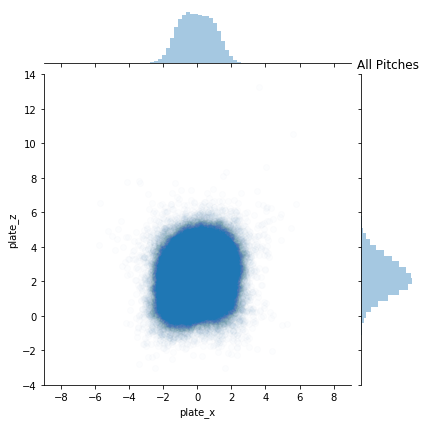

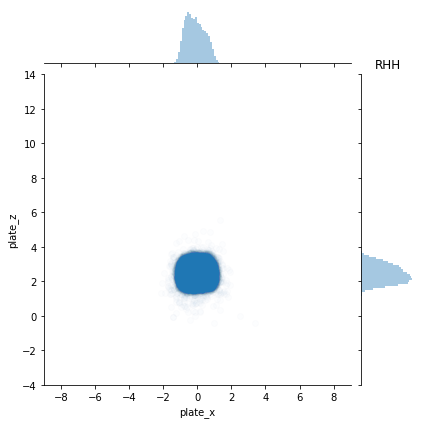

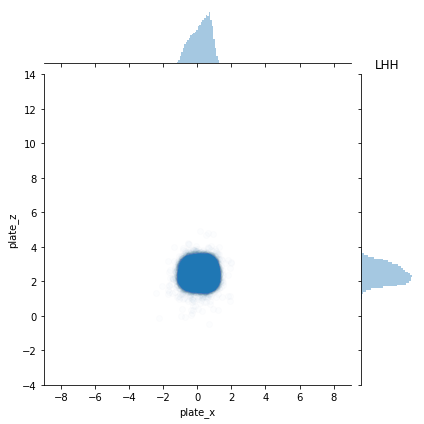

In [67]:
sns.jointplot("plate_x","plate_z",data=called_pitches,xlim=[-9,9],ylim=[-4,14],alpha=0.01)
plt.title('All Pitches')
plt.show()
sns.jointplot("plate_x","plate_z",data=called_pitches[(called_pitches['batside'] == 'R') & (called_pitches['calledstrike'] == 1)],xlim=[-9,9],ylim=[-4,14],alpha=0.01)
plt.title('RHH')
plt.show()
sns.jointplot("plate_x","plate_z",data=called_pitches[(called_pitches['batside'] == 'L') & (called_pitches['calledstrike'] == 1)],xlim=[-9,9],ylim=[-4,14],alpha=0.01)
plt.title('LHH')
plt.show()

In [12]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from scipy.ndimage.filters import gaussian_filter

In [13]:
all_called_pitches = called_pitches.copy()

In [14]:
df['batside'].unique()

array(['R', 'L'], dtype=object)

In [216]:
def make_heatmap(x, y, bins):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[-4, 4], [0, 8]], density=False)
    return heatmap, xedges, yedges

def prepare_dataset(called_pitches, bins=100, s=1):
    
    called_balls = called_pitches[called_pitches['ball'] == 1][['plate_x','plate_z','calledstrike']]
    called_strikes = called_pitches[called_pitches['calledstrike'] == 1][['plate_x','plate_z','calledstrike']]

    balls_map, balls_xedges, balls_yedges = make_heatmap(called_balls['plate_x'].values, called_balls['plate_z'].values, bins=bins)
    balls_map = np.flip(balls_map.T,axis=0)
    strikes_map, _, _ = make_heatmap(called_strikes['plate_x'].values, called_strikes['plate_z'].values, bins=bins)
    strikes_map = np.flip(strikes_map.T,axis=0)

    totals_map = balls_map + strikes_map
    totals_normed_map = totals_map / called_pitches.shape[0]

    strike_probabilites_map = np.nan_to_num(strikes_map / totals_map)
    balls_probabilites_map = np.nan_to_num(balls_map / totals_map)

    probabilities_difference_map = (strike_probabilites_map * 2) - 1

    strikes_map = gaussian_filter(strikes_map, sigma=s)
    balls_map = gaussian_filter(balls_map, sigma=s)
    totals_normed_map = gaussian_filter(totals_map, sigma=s)
    strike_probabilites_map = gaussian_filter(strike_probabilites_map, sigma=s)
    balls_probabilites_map = gaussian_filter(balls_probabilites_map, sigma=s)
    probabilities_difference_map = gaussian_filter(probabilities_difference_map, sigma=s)

    #strike_probabilites_map[strikes_map < 2] = np.nan
    #balls_probabilites_map[balls_map < 2] = np.nan
    #probabilities_difference_map[totals_map < 20] = np.nan
    #totals_map[totals_map < 20] = np.nan
    #strikes_map[strikes_map < 2] = np.nan
    #balls_map[balls_map < 2] = np.nan
    
    return strikes_map, balls_map, totals_normed_map, strike_probabilites_map, balls_probabilites_map, probabilities_difference_map, totals_map

def make_zone_subplot(values_map, fig, ax, cmap='RdBu', extent=[-4, 4, 0, 8], contour_X=None, contour_Y=None, alpha=0.7, vmin=None, vmax=None, norm=None, cbar_label='', legend=False):
    if contour_X is not None and contour_Y is not None:
        imc = ax.contour(X,Y,values_map, extent=extent, cmap=cmap)
        #fig.colorbar(im1c, ax=ax1)
    im = ax.imshow(values_map, extent=extent, cmap=cmap, alpha=alpha, vmin=vmin, vmax=vmax, norm=norm)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(cbar_label)
    ax = make_zone_lines(ax)
    #ax.grid(color='black', linestyle='--', linewidth=0.1, alpha=0.5)
    return ax, fig

def make_zone_lines(ax, color='black', legend=False):
    y_array = [1.6,3.4]
    plate_left = Line2D([-2./3,-2./3],y_array,linestyle='-',color=color)
    plate_left_plus = Line2D([-2./3-1.5/12,-2./3-1.5/12],y_array,linestyle='--',color=color)
    plate_right = Line2D([2./3,2./3],y_array,linestyle='-',color=color)
    plate_right_plus = Line2D([2./3+1.5/12,2./3+1.5/12],y_array,linestyle='--',color=color)
    line1 = ax.add_line(copy.copy(plate_left))
    line2 = ax.add_line(copy.copy(plate_right))
    line3 = ax.add_line(copy.copy(plate_left_plus))
    line4 = ax.add_line(copy.copy(plate_right_plus))
    
    if legend is True:
        ax = ax.legend((line1, line2,), ('Plate Edge','1/2 Ball Width Past Plate Edge',))
    return ax

In [17]:
strikes_map, balls_map, totals_map, strike_probabilites_map, balls_probabilites_map, probabilities_difference_map, totals_map_all_pitches = prepare_dataset(called_pitches)

/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


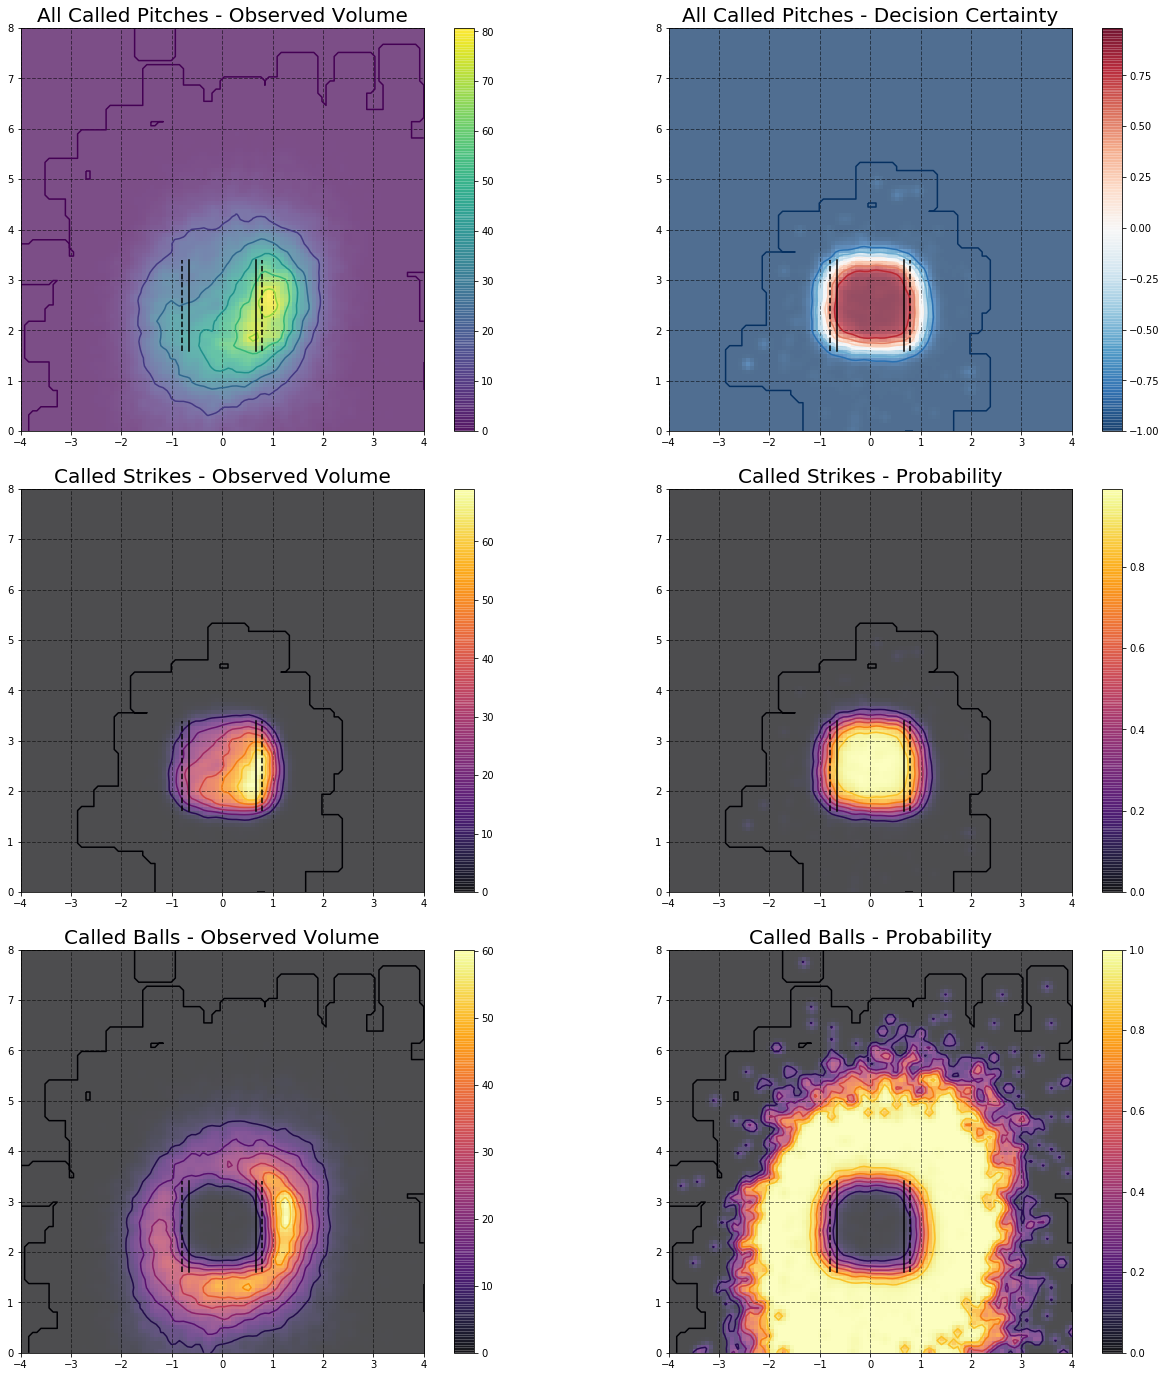

In [65]:

bins=100
alpha = 0.7

fig = plt.figure()
ax31 = fig.add_axes([0., 0., 1.4, 1.4, ])
ax31.set_title('Called Balls - Observed Volume', fontdict={'fontsize': 20})
ax32 = fig.add_axes([1.5, 0., 1.4, 1.4, ])
ax32.set_title('Called Balls - Probability', fontdict={'fontsize': 20})
ax21 = fig.add_axes([0., 1.6, 1.4, 1.4, ])
ax21.set_title('Called Strikes - Observed Volume', fontdict={'fontsize': 20})
ax22 = fig.add_axes([1.5, 1.6, 1.4, 1.4, ])
ax22.set_title('Called Strikes - Probability', fontdict={'fontsize': 20})
ax11 = fig.add_axes([0., 3.2, 1.4, 1.4, ])
ax11.set_title('All Called Pitches - Observed Volume', fontdict={'fontsize': 20})
ax12 = fig.add_axes([1.5, 3.2, 1.4, 1.4, ])
ax12.set_title('All Called Pitches - Decision Certainty', fontdict={'fontsize': 20})

x = np.linspace(-4.,4.,bins)
y = np.linspace(8,0,bins)
X, Y = np.meshgrid(x,y)



strikes_map, balls_map, totals_map, strike_probabilites_map, balls_probabilites_map, probabilities_difference_map, totals_map_all_pitches = prepare_dataset(
    called_pitches[called_pitches['batside'] == 'L'])
ax11 = make_zone_subplot(totals_map, fig, ax11, cmap='viridis', contour_X=X, contour_Y=Y)
ax12 = make_zone_subplot(probabilities_difference_map, fig, ax12, cmap='RdBu_r', contour_X=X, contour_Y=Y)
ax21 = make_zone_subplot(strikes_map, fig, ax21, cmap='inferno', contour_X=X, contour_Y=Y)
ax22 = make_zone_subplot(strike_probabilites_map, fig, ax22, cmap='inferno', contour_X=X, contour_Y=Y)
ax31 = make_zone_subplot(balls_map, fig, ax31, cmap='inferno', contour_X=X, contour_Y=Y)
ax32 = make_zone_subplot(balls_probabilites_map, fig, ax32, cmap='inferno', contour_X=X, contour_Y=Y)

fig.show()

/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


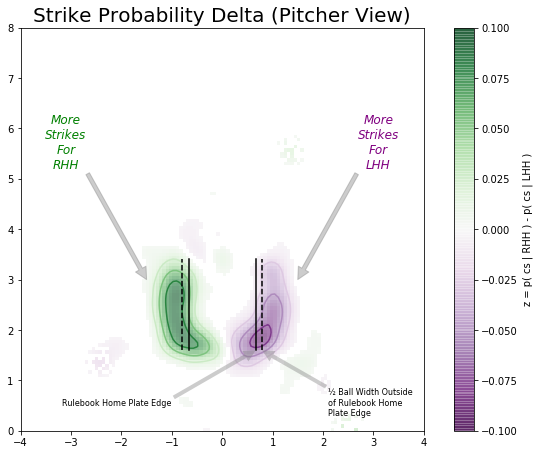

In [217]:
fig = plt.figure()
#ax1 = fig.add_axes([0., 0., 1.4, 1.4, ])
#ax1.set_title('LHH Strike Probabilities', fontdict={'fontsize': 20})

ax2 = fig.add_axes([1.3, 0., 1.4, 1.4, ])
ax2.set_title('Strike Probability Delta (Pitcher View)', fontdict={'fontsize': 20})

#ax3 = fig.add_axes([2.6, 0., 1.4, 1.4, ])
#ax3.set_title('RHH Strike Probabilities', fontdict={'fontsize': 20})

alpha = 0.6
bins=120
s=2.8


x = np.linspace(-4.,4.,bins)
y = np.linspace(8,0,bins)
X, Y = np.meshgrid(x,y)

_, _, _, strike_probabilites_map_r, _, _, _ = prepare_dataset(called_pitches[(called_pitches['batside'] == 'R')], bins=bins, s=s)
#ax3, fig = make_zone_subplot(strike_probabilites_map_r, fig, ax3, cmap='Greens', contour_X=X, contour_Y=Y, vmin=0., vmax=1.0, alpha=alpha)

_, _, _, strike_probabilites_map_l, _, _, totals_map_all_pitches = prepare_dataset(called_pitches[called_pitches['batside'] == 'L'], bins=bins, s=s)
#ax1, fig = make_zone_subplot(strike_probabilites_map_l, fig, ax1, cmap='Purples', contour_X=X, contour_Y=Y, vmin=0., vmax=1.0, alpha=alpha)

strike_probabilities_delta = (strike_probabilites_map_r - strike_probabilites_map_l)
strike_probabilities_delta[totals_map_all_pitches < 1] = np.nan
strike_probabilities_delta[np.abs(strike_probabilities_delta) < 0.005] = np.nan
norm = cm.colors.Normalize(vmax=abs(strike_probabilities_delta).max(), vmin=-abs(strike_probabilities_delta).max())
ax2, fig = make_zone_subplot(strike_probabilities_delta, fig, ax2, cmap='PRGn', contour_X=X, contour_Y=Y, norm=norm, alpha=alpha, cbar_label='z = p( cs | RHH ) - p( cs | LHH )', legend=True)

text_args = {'fontweight':'ultralight', 'fontsize':12, 'horizontalalignment':'center', 'fontstyle':'italic'}

arrowprops = {'color':'grey','alpha':0.4}
ax2.annotate('More\nStrikes\nFor\nRHH', (-1.5,3.0), xytext=(-3.1,5.2), arrowprops=arrowprops, color='green', **text_args)
ax2.annotate('More\nStrikes\nFor\nLHH', (1.5,3.0), xytext=(3.1,5.2), arrowprops=arrowprops, color='purple', **text_args)

text2_args = {'fontweight':'ultralight', 'fontsize':8}
arrowprops = {'color':'grey','alpha':0.4, 'linewidth':0.001}
ax2.annotate('Rulebook Home Plate Edge', (2./3,1.6), xytext=(-1.,0.5), arrowprops=arrowprops, color='black', **text2_args, horizontalalignment='right')
ax2.annotate('½ Ball Width Outside\nof Rulebook Home\nPlate Edge', (2./3+1.5/12,1.6), xytext=(2.1,0.3), arrowprops=arrowprops, color='black', **text2_args, horizontalalignment='left')

#plt.savefig('strike_zone_delta.svg')
plt.show()